# import

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import rpy2
%load_ext rpy2.ipython 

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
url = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data/solar_radiation2.csv'
df = pd.read_csv(url)

# Create Data

In [8]:
%R -i df

In [13]:
%%R
library(tidyverse)
library(dplyr)
library(lubridate)

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [14]:
%%R
df = df |> mutate(date=ymd_hm(date))

In [15]:
%%R
df <- df %>%
          group_by(region) %>%
          mutate(row = row_number()) %>%
          tidyr::pivot_wider(names_from = region, values_from = solar_radiation) %>%
          select(-row)

In [16]:
%%R
head(df)

# A tibble: 6 × 45
  date                북춘천  철원 대관령  춘천 백령도 북강릉  강릉  서울  인천
  <dttm>               <dbl> <dbl>  <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl> <dbl>
1 2021-01-01 00:00:00      0     0      0     0      0      0     0     0     0
2 2021-01-01 01:00:00      0     0      0     0      0      0     0     0     0
3 2021-01-01 02:00:00      0     0      0     0      0      0     0     0     0
4 2021-01-01 03:00:00      0     0      0     0      0      0     0     0     0
5 2021-01-01 04:00:00      0     0      0     0      0      0     0     0     0
6 2021-01-01 05:00:00      0     0      0     0      0      0     0     0     0
# … with 35 more variables: 원주 <dbl>, 울릉도 <dbl>, 수원 <dbl>, 서산 <dbl>,
#   청주 <dbl>, 대전 <dbl>, 추풍령 <dbl>, 안동 <dbl>, 포항 <dbl>, 대구 <dbl>,
#   전주 <dbl>, 창원 <dbl>, 광주 <dbl>, 부산 <dbl>, 목포 <dbl>, 여수 <dbl>,
#   흑산도 <dbl>, 고창 <dbl>, 홍성 <dbl>, 제주 <dbl>, 고산 <dbl>, 진주 <dbl>,
#   고창군 <dbl>, 영광군 <dbl>, 김해시 <dbl>, 순창군 <dbl>, 북창원 <dbl>,
#   양산시 <dbl>, 보성군 <dbl>, 강진군 <dbl>, 의령군 

In [20]:
%%R
write.csv(df, '../SOLAR/data/df_arima.csv', row.names=FALSE)

# ARIMA

In [21]:
df = pd.read_csv('../SOLAR/data/df_arima.csv')
df.head()

,date,북춘천,철원,대관령,춘천,백령도,북강릉,강릉,서울,인천,...,순창군,북창원,양산시,보성군,강진군,의령군,함양군,광양시,청송군,경주시
0,2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df['date'].describe()

<ipython-input-42-07e98f8ab9f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                   17520
unique                  17520
top       2021-01-01 00:00:00
freq                        1
first     2021-01-01 00:00:00
last      2022-12-31 23:00:00
Name: date, dtype: object

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df = df.set_index(df['date'])

In [39]:
df.index = pd.DatetimeIndex(df.index).to_period('H')

In [22]:
# df1 = df.copy()

In [24]:
# df.info()

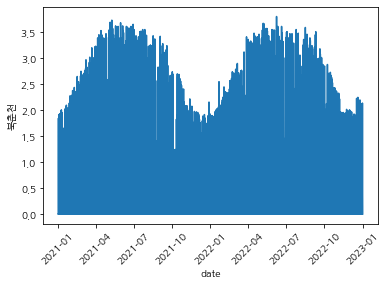

In [34]:
# 전체
sns.lineplot(data=df, x='date', y='북춘천')
plt.xticks(rotation=45)
plt.show()

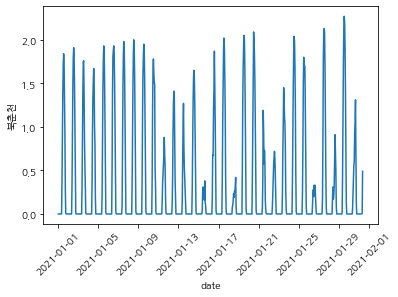

In [32]:
# 2021-01-01 부터 한달간.
sns.lineplot(data=df[:760], x='date', y='북춘천')
plt.xticks(rotation=45)
plt.show()

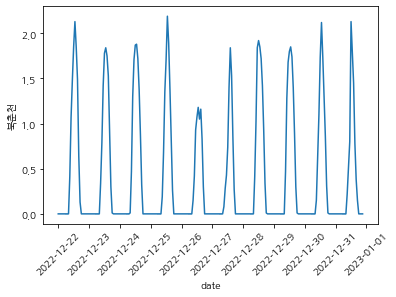

In [31]:
# 최근 10일간
sns.lineplot(data=df[df.shape[0]-250:], x='date', y='북춘천')
plt.xticks(rotation=45)
plt.show()

# Time Series Decomposition

In [43]:
import statsmodels.tsa.api as tsa

In [44]:
df.index

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00',
             '2021-01-01 06:00', '2021-01-01 07:00', '2021-01-01 08:00',
             '2021-01-01 09:00',
             ...
             '2022-12-31 14:00', '2022-12-31 15:00', '2022-12-31 16:00',
             '2022-12-31 17:00', '2022-12-31 18:00', '2022-12-31 19:00',
             '2022-12-31 20:00', '2022-12-31 21:00', '2022-12-31 22:00',
             '2022-12-31 23:00'],
            dtype='period[H]', name='date', length=17520)

In [52]:
df1['date'] = pd.to_datetime(df1['date'])

In [56]:
df1 = df1.set_index(df1['date'])

In [62]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

In [63]:
## 그림 그리기용
y_chuncheon = df1['북춘천'].resample('1D').mean()

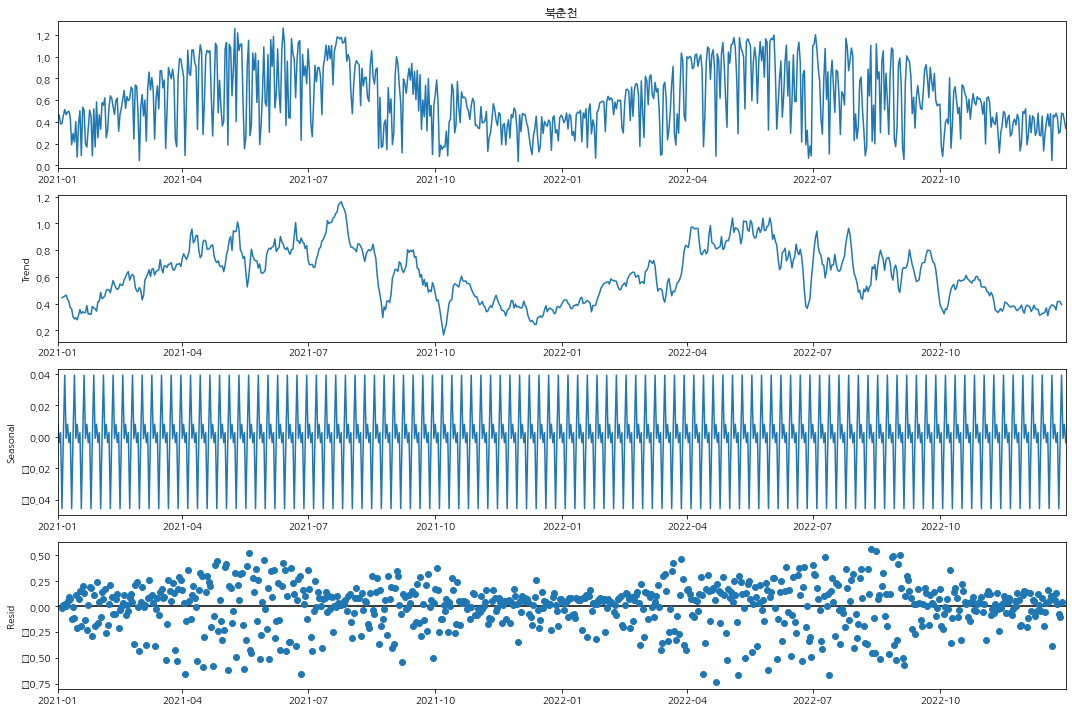

In [64]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y_chuncheon, model = 'additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

- Fig1: 트렌드 O
- Fig2: 계절성 O
- Fig3: 잔차

In [68]:
24*14

336

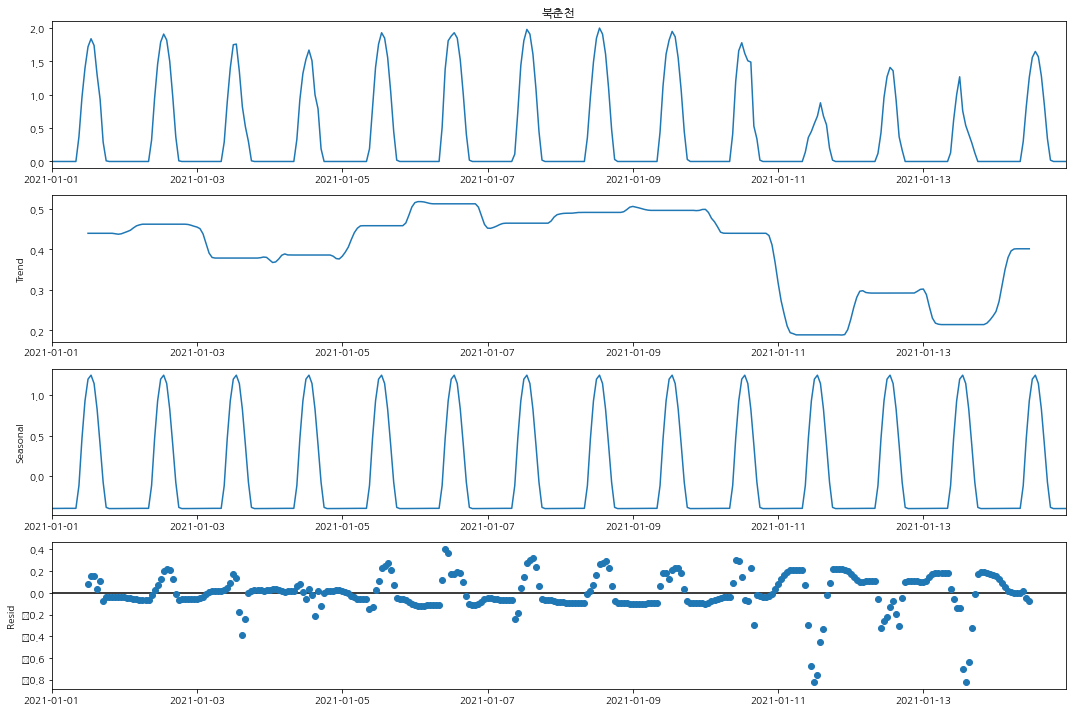

In [69]:
tsa.seasonal_decompose(df1['북춘천'][:336], model = 'additive').plot() # 2주간 일사량 
plt.show()

- 하루 주기...
- 이게 맞나??

# ARIMA

`to_period('H')` 처음 df에 적용하면 train/test 안나눠짐.

In [77]:
idx = int(len(df1)*0.7)
train = df1.iloc[:idx].set_index('date').to_period('H')
test = df1.iloc[idx:].set_index('date').to_period('H')

In [79]:
train.index

PeriodIndex(['2021-01-01 00:00', '2021-01-01 01:00', '2021-01-01 02:00',
             '2021-01-01 03:00', '2021-01-01 04:00', '2021-01-01 05:00',
             '2021-01-01 06:00', '2021-01-01 07:00', '2021-01-01 08:00',
             '2021-01-01 09:00',
             ...
             '2022-05-26 14:00', '2022-05-26 15:00', '2022-05-26 16:00',
             '2022-05-26 17:00', '2022-05-26 18:00', '2022-05-26 19:00',
             '2022-05-26 20:00', '2022-05-26 21:00', '2022-05-26 22:00',
             '2022-05-26 23:00'],
            dtype='period[H]', name='date', length=12264)

In [80]:
import itertools

In [102]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ (x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))] 

In [103]:
param_list = []
param_seasonal_list = []
results_AIC_list = []
results_MSE_list = []

In [104]:
y = train['북춘천']

In [105]:
### 에러.. (시간빠진부분 있어서 그런듯) --> 이제 에러메시지 안나옴.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
            results_MSE_list.append(results.mse)
        except:
            continue

- [Maximum Likelihood optimization error](https://stats.stackexchange.com/questions/313426/mle-convergence-errors-with-statespace-sarimax) --> 해결 (주기 잘못 설정했었음)

In [107]:
# import pickle
# with open('../SOLAR/sarima.pickle','wb') as fw:
#     pickle.dump(results, fw)

In [108]:
print(results.mle_retvals)

{'fopt': -0.06486926617814603, 'gopt': array([-6.65678207e-06, -7.14323739e-06, -1.06441383e-06,  8.18323187e-07,
        4.19823898e-07]), 'fcalls': 186, 'warnflag': 0, 'converged': True, 'iterations': 25}


<ipython-input-109-e7cef7d4c2cb>:2: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/home/jy/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


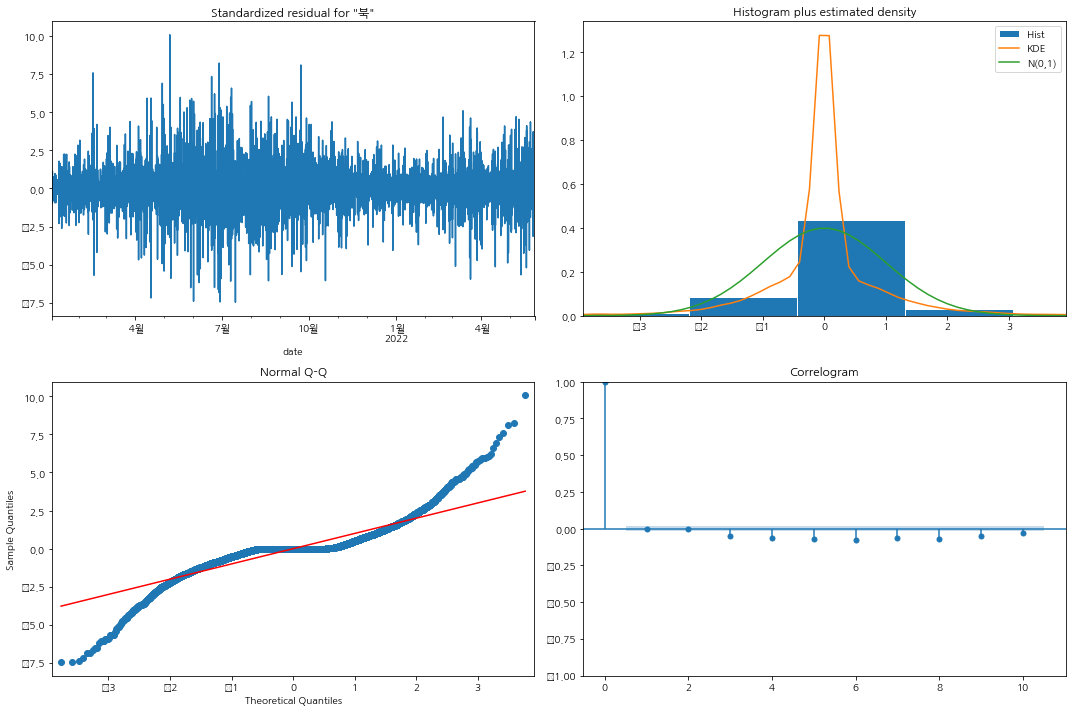

In [109]:
results.plot_diagnostics()
plt.tight_layout()
plt.show()

In [110]:
print(len(param_list), len(param_seasonal_list), len(results_AIC_list), len(results_MSE_list))

64 64 64 64


In [111]:
ARIMA_list = pd.DataFrame({'Parameter':param_list, 'Seasonal':param_seasonal_list, 'AIC':results_AIC_list, 'MSE':results_MSE_list})

In [112]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC,MSE
45,"(1, 0, 1)","(1, 0, 1, 24)",-2626.198342,0.047077
47,"(1, 0, 1)","(1, 1, 1, 24)",-2615.342292,0.047156
43,"(1, 0, 1)","(0, 1, 1, 24)",-2614.881871,0.047215
37,"(1, 0, 0)","(1, 0, 1, 24)",-2339.639445,0.048197
39,"(1, 0, 0)","(1, 1, 1, 24)",-2329.975704,0.048263
...,...,...,...,...
4,"(0, 0, 0)","(1, 0, 0, 24)",19541.909535,0.289569
2,"(0, 0, 0)","(0, 1, 0, 24)",20281.006148,0.307584
8,"(0, 0, 1)","(0, 0, 0, 24)",23982.934250,0.413705
1,"(0, 0, 0)","(0, 0, 1, 24)",29662.755191,0.660274


In [113]:
ARIMA_list.sort_values(by='MSE')

,Parameter,Seasonal,AIC,MSE
45,"(1, 0, 1)","(1, 0, 1, 24)",-2626.198342,0.047077
47,"(1, 0, 1)","(1, 1, 1, 24)",-2615.342292,0.047156
43,"(1, 0, 1)","(0, 1, 1, 24)",-2614.881871,0.047215
37,"(1, 0, 0)","(1, 0, 1, 24)",-2339.639445,0.048197
39,"(1, 0, 0)","(1, 1, 1, 24)",-2329.975704,0.048263
...,...,...,...,...
4,"(0, 0, 0)","(1, 0, 0, 24)",19541.909535,0.289569
2,"(0, 0, 0)","(0, 1, 0, 24)",20281.006148,0.307584
8,"(0, 0, 1)","(0, 0, 0, 24)",23982.934250,0.413705
1,"(0, 0, 0)","(0, 0, 1, 24)",29662.755191,0.660274


`(1, 0, 1)(1, 0, 1, 24)`

In [118]:
mod = tsa.statespace.SARIMAX(y, order=(1,0,1),
                                            seasonal_order=(1,0,1,24),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8283      0.004    215.697      0.000       0.821       0.836
ma.L1          0.1617      0.005     35.054      0.000       0.153       0.171
ar.S.L24       0.9999      0.000   3471.709      0.000       0.999       1.000
ma.S.L24      -0.9439      0.002   -440.023      0.000      -0.948      -0.940
sigma2         0.0470      0.000    174.428      0.000       0.046       0.048


In [120]:
# import pickle
# with open('../SOLAR/sarima_best.pickle','wb') as fw:
#     pickle.dump(results, fw)

In [121]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                북춘천   No. Observations:                12264
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood                1318.099
Date:                              화, 11  4월 2023   AIC                          -2626.198
Time:                                    01:11:50   BIC                          -2589.137
Sample:                                01-01-2021   HQIC                         -2613.778
                                     - 05-26-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8283      0.004    215.697      0.000       0.821       0.836
ma.L1          0.1617      0.005   

## MSE

In [104]:
## MSE
def mse_(real, pred):
    diff = real - pred
    return mean(diff^2)

In [128]:
test

,북춘천,철원,대관령,춘천,백령도,북강릉,강릉,서울,인천,원주,...,순창군,북창원,양산시,보성군,강진군,의령군,함양군,광양시,청송군,경주시
date,,,,,,,,,,,,,,,,,,,,,
2022-05-27 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-27 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-27 02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-27 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-27 04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
train['북춘천'].index[0], train['북춘천'].index[-1]

(Period('2021-01-01 00:00', 'H'), Period('2022-05-26 23:00', 'H'))

In [170]:
train_pred = results.predict(start = train['북춘천'].index[0], end = train['북춘천'].index[-1]).values

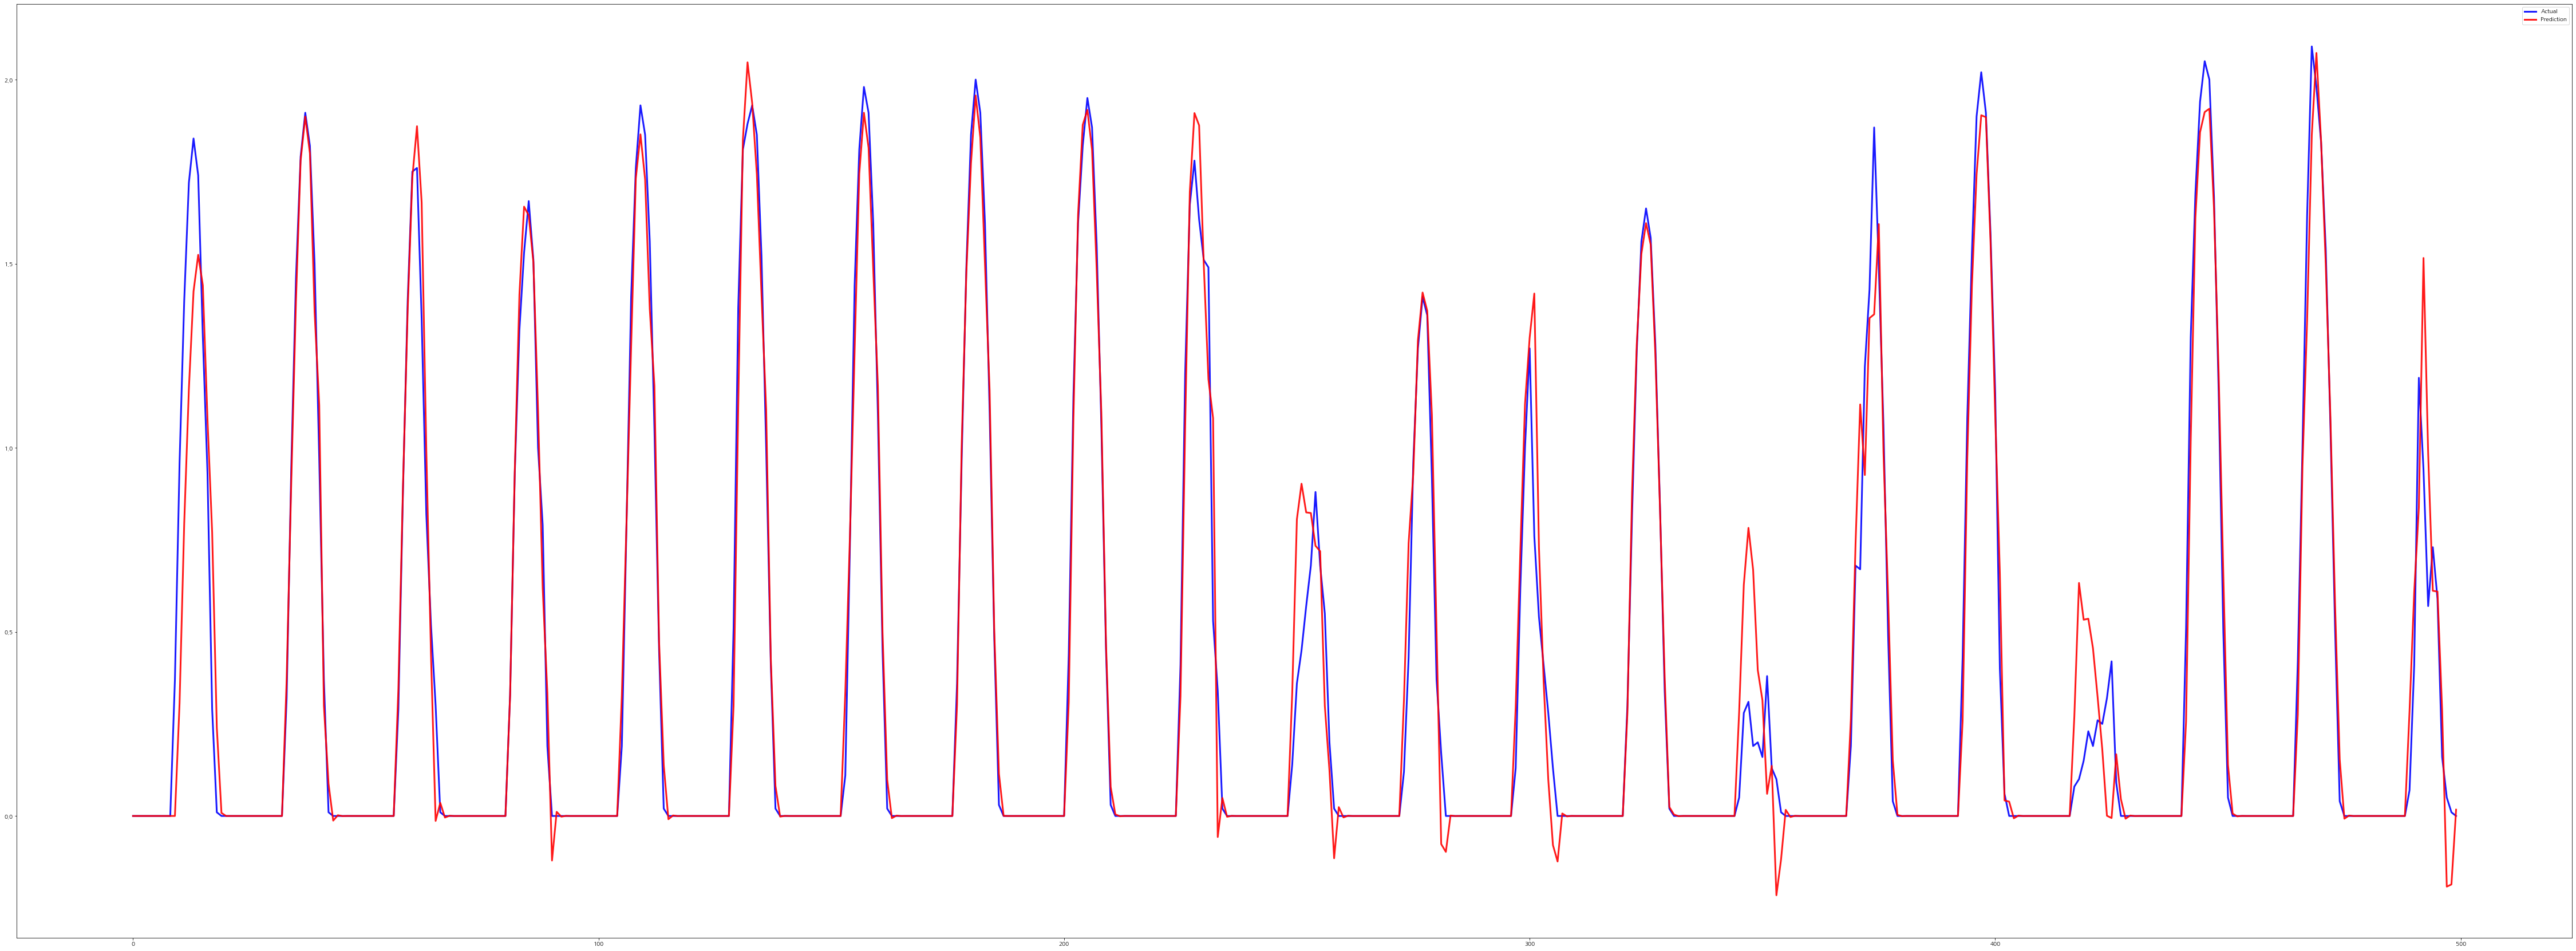

In [171]:
fig = plt.figure(figsize = (80,30))
plt.plot(train['북춘천'].values[:500], "b-", label = "Actual", alpha = 0.9, lw=3)
plt.plot(train_pred[:500], "r-", label = "Prediction", alpha = 0.9, lw=3)
plt.legend()
plt.show()

In [169]:
## fitting
steps = len(test)
test_pred = results.forecast(steps).values

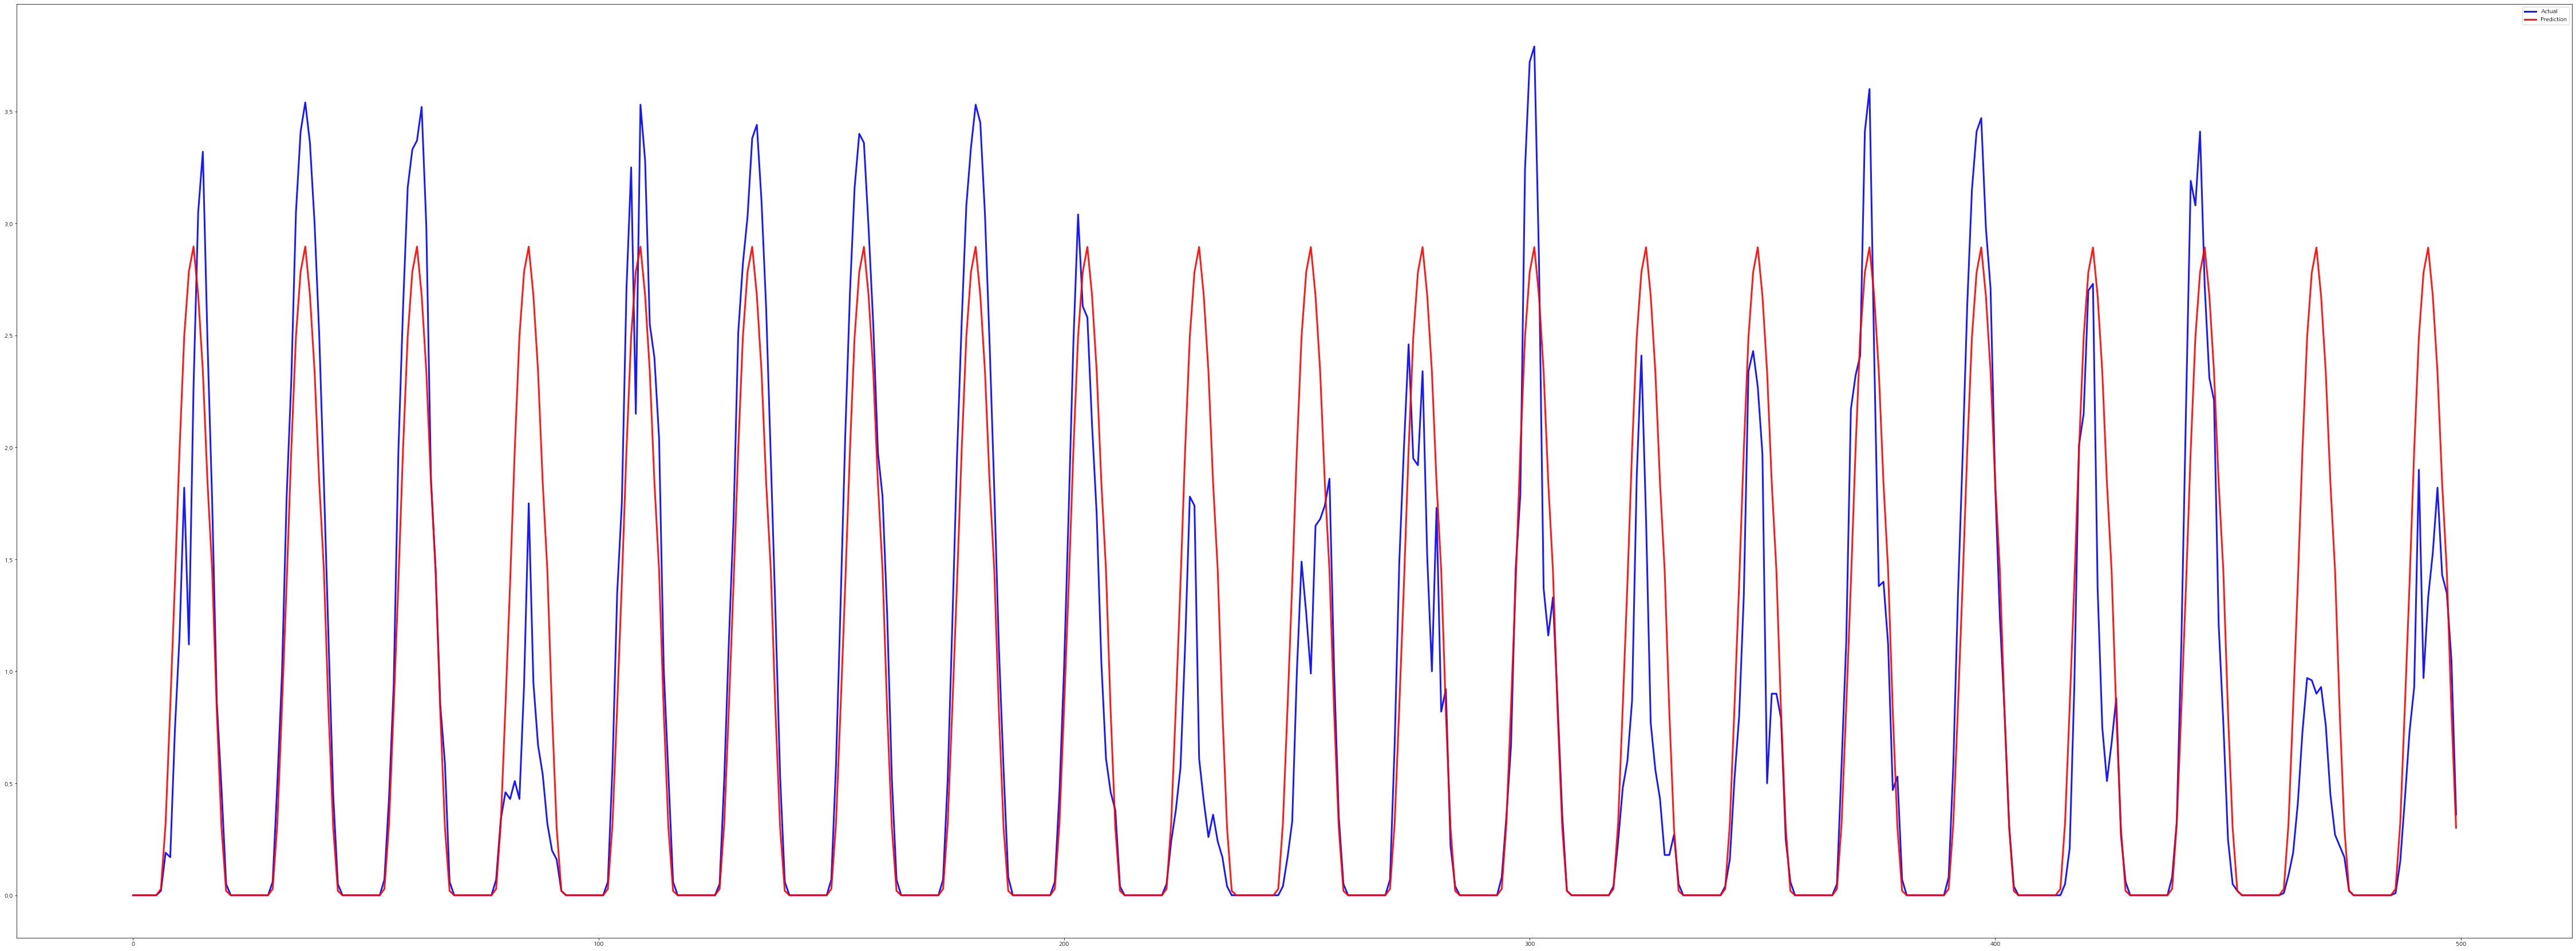

In [161]:
fig = plt.figure(figsize = (80,30))
plt.plot(test['북춘천'].values[:500], "b-", label = "Actual", alpha = 0.9, lw=3)
plt.plot(results.forecast(steps).values[:500], "r-", label = "Prediction", alpha = 0.9, lw=3)
plt.legend()
plt.show()

- ...

In [168]:
from sklearn.metrics import mean_squared_error as MSE

In [173]:
print(MSE(train['북춘천'].values, train_pred))
print(MSE(test['북춘천'].values, test_pred))


0.047077332895820334
0.47824005920354684


- 완전 과적합..

- ref: [How to interpret Negative AIC Vluaes](https://www.statology.org/negative-aic/)

- ref: <https://direction-f.tistory.com/71> (시계열 관련)
- ref: <https://stackoverflow.com/questions/38033570/seasonal-decompose-raises-error-typeerror-periodindex-given-check-the-freq> (freq: 에러)